Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report

Loading the dataset after feature selection and preparing for modeling

In [ ]:
try:
    df = pd.read_csv('feature_selected_dataset.csv')
    print("Feature-selected dataset loaded.")
except FileNotFoundError:
    print("Error: 'feature_selected_dataset.csv' not found.")
    exit()
X = df.drop('target', axis=1)
y = df['target']
#80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
final_model_columns = list(X_train.columns)
print("Copy this exact list of columns for your Streamlit app:")
print(final_model_columns)
print(f"Data split complete: {len(X_train)} training samples, {len(X_test)} testing samples.")

Feature-selected dataset loaded.
Copy this exact list of columns for your Streamlit app:
['PC_1', 'PC_6', 'PC_5', 'PC_11', 'PC_2', 'PC_7', 'PC_4', 'PC_12', 'PC_10', 'PC_8', 'PC_9', 'PC_13']
Data split complete: 242 training samples, 61 testing samples.


ML Models


--- Training Logistic Regression ---
Accuracy: 0.8525
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.83      0.86      0.84        28

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


--- Training Decision Tree ---
Accuracy: 0.7869
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.74      0.82      0.78        28

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61


--- Training Random Forest ---
Accuracy: 0.8852
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.89      0.86      0.87        28

    accuracy                 

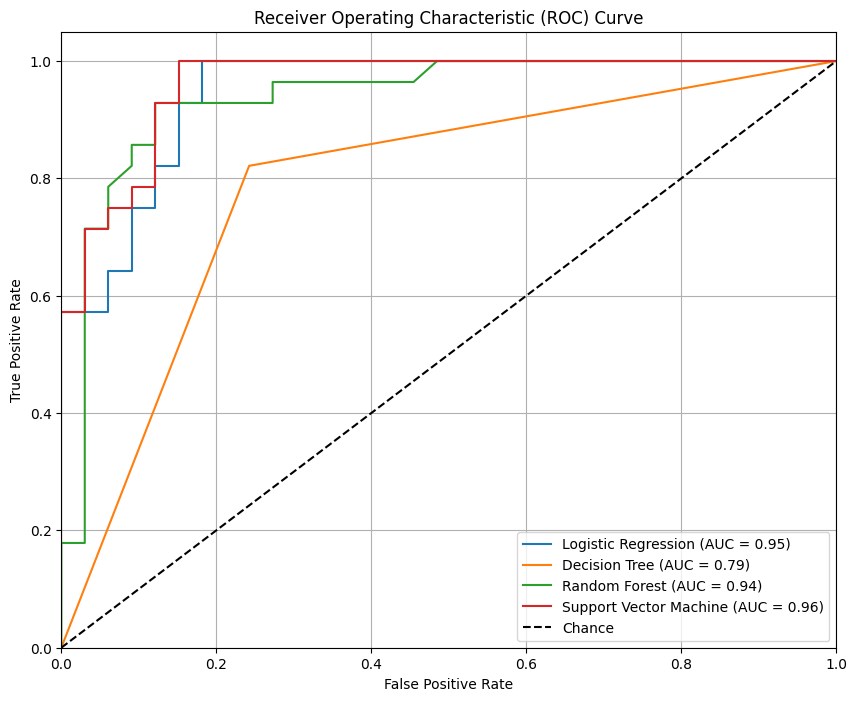


--- Performance Comparison of All Models ---
                        Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression     0.852459   0.827586  0.857143  0.842105  0.948052
Decision Tree           0.786885   0.741935  0.821429  0.779661  0.789502
Random Forest           0.885246   0.888889  0.857143  0.872727  0.938312
Support Vector Machine  0.885246   0.862069  0.892857  0.877193  0.962121

Evaluation metrics saved to 'C:/MENNA_DATA/Heart_Disease_Project/evaluation_metrics.csv'


In [6]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42) 
}

results = {}
plt.figure(figsize=(10, 8))
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': roc_auc
    }
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()
results_df = pd.DataFrame(results).T
print("\n--- Performance Comparison of All Models ---")
print(results_df)
results_df.to_csv('C:/MENNA_DATA/Heart_Disease_Project/evaluation_metrics.csv')
print("\nEvaluation metrics saved to 'C:/MENNA_DATA/Heart_Disease_Project/evaluation_metrics.csv'")